In [1]:
# Load packages and libraries

import pandas as pd
import numpy as np
import quandl
import requests
from dotenv import load_dotenv
import os
import yfinance as yf
import matplotlib.pyplot as plt
import random
from datetime import date
import warnings
import json
import plotly.express as px

# Ignore warnings

warnings.filterwarnings("ignore")

In [2]:
# Function for all graphs

def plot_graph(df, title:str, y_label: str):
    
        ## graphing the data

    cols =[col for col in df.columns]

    fig,ax = plt.subplots(1,1, figsize = (14,6))
    plt.style.use("seaborn")

    for c in cols: 
        ax.plot(c, linewidth=2, data=df)
        ax.set_title(title)
        plt.xlabel("Date")
        plt.ylabel(y_label)

        handles,labels = ax.get_legend_handles_labels()
        ax.legend(handles, labels, loc="upper left", prop = {"size":10})

    plt.show()

### Weapons Manufacturers' Stock Data

#### The Gulf War

In [3]:
# Get weapons stock data for Gulf War from Yahoo Finance

tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1990-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

weapons_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Investigate dataframe

weapons_gulf_df.head()

Open       High        Low      Close  Adj Close  Volume  \
Date                                                                        
1990-02-01  11.963190  11.963190  11.694785  11.733129   4.849934  163000   
1990-02-02  11.656442  11.924847  11.656442  11.924847   4.929182  399676   
1990-02-05  12.039877  12.078221  11.694785  11.694785   4.834084  421192   
1990-02-06  11.694785  11.694785  11.273006  11.311350   4.675587  262430   
1990-02-07  11.273006  11.388037  11.081288  11.273006   4.659740  567892   

           ticker  
Date               
1990-02-01    LMT  
1990-02-02    LMT  
1990-02-05    LMT  
1990-02-06    LMT  
1990-02-07    LMT

In [5]:
# Convert dataframe to csv and move to Resources folder

# weapons_gulf_df.to_csv("weapons_gulf.csv")

In [6]:
# Clean up dataframe to include only closing prices

weapons_gulf_df = weapons_gulf_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
weapons_gulf_df = weapons_gulf_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

weapons_gulf_df.head()

ticker             BA        LMT       NOC       RTX
Date                                                
1990-02-01  20.416668  11.733129  8.075031  3.952958
1990-02-02  20.750000  11.924847  7.962094  3.933291
1990-02-05  21.041668  11.694785  7.905625  3.992291
1990-02-06  21.166668  11.311350  7.679750  3.923458
1990-02-07  21.166668  11.273006  7.905625  3.923458

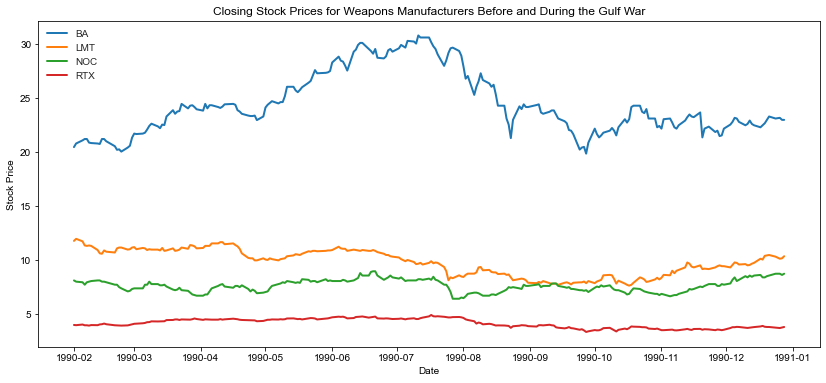

In [7]:
# Plot closing prices

plot_graph(weapons_gulf_df, title="Closing Stock Prices for Weapons Manufacturers Before and During the Gulf War", y_label="Stock Price")

#### The War in Iraq

In [8]:
# Get weapon stock data for the War in Iraq from Yahoo Finance

tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2003-03-01", end="2011-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

weapons_iraq_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [9]:
# Investigate dataframe

weapons_iraq_df.head()

Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2003-03-03  46.389999  46.619999  45.700001  45.779999  27.045059  2123500   
2003-03-04  45.790001  46.450001  44.910000  46.080002  27.222292  2535100   
2003-03-05  44.209999  45.900002  42.560001  45.080002  26.631529  4945000   
2003-03-06  45.090000  45.200001  44.090000  44.570000  26.330231  5266300   
2003-03-07  44.570000  44.570000  43.000000  43.560001  25.733566  5048900   

           ticker  
Date               
2003-03-03    LMT  
2003-03-04    LMT  
2003-03-05    LMT  
2003-03-06    LMT  
2003-03-07    LMT

In [10]:
# Convert dataframe to csv and move to Resources folder

# weapons_iraq_df.to_csv("weapons_iraq.csv")

In [11]:
# Clean up dataframe to include only closing prices

weapons_iraq_df = weapons_iraq_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
weapons_iraq_df = weapons_iraq_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

weapons_iraq_df.head()

ticker             BA        LMT        NOC        RTX
Date                                                  
2003-03-03  27.110001  45.779999  39.130585  18.187538
2003-03-04  27.450001  46.080002  39.419704  17.929516
2003-03-05  26.740000  45.080002  37.834064  17.866583
2003-03-06  26.160000  44.570000  37.974106  17.709251
2003-03-07  25.840000  43.560001  37.373280  17.973568

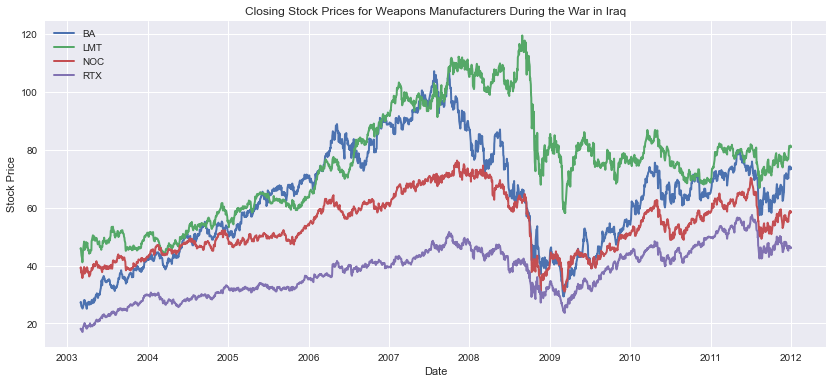

In [12]:
# Plot closing prices

plot_graph(weapons_iraq_df, title="Closing Stock Prices for Weapons Manufacturers During the War in Iraq", y_label="Stock Price")

#### The Russian Invasion of Ukraine

In [13]:
# Get weapon stock data for the Russian Invasion of Ukraine from Yahoo Finance

tickerStrings = ["LMT", "BA", "RTX", "NOC"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-01", end="2022-06-30")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

weapons_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [14]:
# Investigate dataframe

weapons_rusua_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-08-02  372.299988  375.040009  368.079987  368.299988  357.936615   
2021-08-03  369.380005  369.910004  366.000000  369.450012  359.054291   
2021-08-04  364.489990  365.359985  359.609985  361.640015  351.464050   
2021-08-05  362.440002  363.019989  359.880005  360.779999  350.628235   
2021-08-06  362.299988  363.459991  360.559998  362.049988  351.862488   

             Volume ticker  
Date                        
2021-08-02  1176500    LMT  
2021-08-03   872900    LMT  
2021-08-04  1608100    LMT  
2021-08-05   912600    LMT  
2021-08-06   704500    LMT

In [15]:
# Convert dataframe to csv in Resources folder

# weapons_rusua_df.to_csv("weapons_rusua.csv")

In [16]:
# Clean up dataframe to include only closing prices

weapons_rusua_df = weapons_rusua_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
weapons_rusua_df = weapons_rusua_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

weapons_rusua_df.head()

ticker              BA         LMT         NOC        RTX
Date                                                     
2021-08-02  225.339996  368.299988  361.839996  86.610001
2021-08-03  229.089996  369.450012  364.440002  87.970001
2021-08-04  226.630005  361.640015  357.250000  85.820000
2021-08-05  229.940002  360.779999  358.720001  86.879997
2021-08-06  231.330002  362.049988  362.109985  87.580002

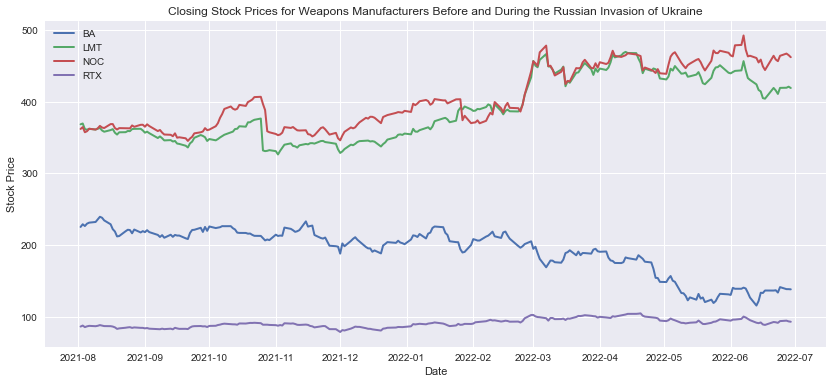

In [17]:
# Plot closing prices

plot_graph(weapons_rusua_df, title="Closing Stock Prices for Weapons Manufacturers Before and During the Russian Invasion of Ukraine", y_label="Stock Price")

### Gas Companies' Stock Data

#### The Gulf War

In [18]:
# Get gas stock data for the Gulf War from Yahoo Finance

tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="1990-02-01", end="1990-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

gas_gulf_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [19]:
# Investigate dataframe

gas_gulf_df.head()

Open      High       Low     Close  Adj Close   Volume ticker
Date                                                                         
1990-02-01  11.81250  11.84375  11.75000  11.75000   3.956183  2903200    XOM
1990-02-02  11.78125  11.96875  11.75000  11.96875   4.029838  4246400    XOM
1990-02-05  12.00000  12.09375  11.96875  12.00000   4.040356  5880400    XOM
1990-02-06  11.84375  11.87500  11.56250  11.81250   4.027573  4739600    XOM
1990-02-07  11.75000  12.00000  11.68750  12.00000   4.091500  4108800    XOM

In [20]:
# Convert dataframe to csv and move to Resources folder

# gas_gulf_df.to_csv("gas_gulf.csv")

In [21]:
# Clean up dataframe to include only closing prices

gas_gulf_df = gas_gulf_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gas_gulf_df = gas_gulf_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

gas_gulf_df.head()

ticker            BP       COP       CVX       XOM
Date                                              
1990-02-01  17.46875  9.767181  16.65625  11.75000
1990-02-02  17.50000  9.767181  16.78125  11.96875
1990-02-05  17.56250  9.767181  16.87500  12.00000
1990-02-06  17.50000  9.862470  16.78125  11.81250
1990-02-07  17.40625  9.957760  16.96875  12.00000

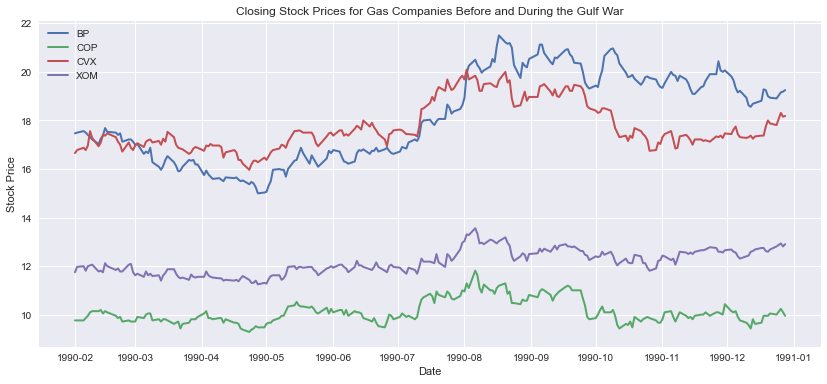

In [22]:
# Plot closing prices

plot_graph(gas_gulf_df, title="Closing Stock Prices for Gas Companies Before and During the Gulf War", y_label="Stock Price")

#### The War in Iraq

In [23]:
# Get gas stock data for the Iraq War from Yahoo Finance

tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2003-03-01", end="2011-12-31")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

gas_iraq_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [24]:
# Investigate dataframe

gas_iraq_df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2003-03-03  34.389999  34.730000  34.200001  34.459999  18.463024  12094000   
2003-03-04  34.700001  34.740002  34.169998  34.230000  18.339796  10453100   
2003-03-05  34.230000  34.919998  34.220001  34.919998  18.709482  12192000   
2003-03-06  34.750000  34.860001  34.410000  34.560001  18.516602  12140800   
2003-03-07  34.099998  34.880001  34.080002  34.790001  18.639822  13199300   

           ticker  
Date               
2003-03-03    XOM  
2003-03-04    XOM  
2003-03-05    XOM  
2003-03-06    XOM  
2003-03-07    XOM

In [25]:
# Convert dataframe to csv and move to Resources folder

# gas_iraq_df.to_csv("gas_iraq.csv")

In [26]:
# Clean up dataframe to include only closing prices

gas_iraq_df = gas_iraq_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gas_iraq_df = gas_iraq_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe

gas_iraq_df.head()

ticker             BP        COP        CVX        XOM
Date                                                  
2003-03-03  39.279999  19.724941  32.270000  34.459999
2003-03-04  39.340000  19.629650  32.325001  34.230000
2003-03-05  39.270000  19.583912  32.974998  34.919998
2003-03-06  39.099998  19.366652  32.689999  34.560001
2003-03-07  38.860001  19.667767  32.630001  34.790001

In [27]:
# Plot closing prices

plot_graph(gas_iraq_df, title="Closing Stock Prices for Gas Companies During the War in Iraq", y_label="Stock Price")

#### The Russian Invasion of Ukraine

In [28]:
# Get gas stock data for the Russian Invasion of Ukraine from Yahoo Finance

tickerStrings = ["XOM", "BP", "COP", "CVX"]
df_list = list()
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", start="2021-08-01", end="2022-06-30")
    data["ticker"] = ticker
    df_list.append(data)

# Combine all dataframes into a single dataframe

gas_rusua_df = pd.concat(df_list)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [29]:
# Investigate dataframe

gas_rusua_df.head()

Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2021-08-02  57.549999  59.060001  57.400002  57.580002  54.794350  20873800   
2021-08-03  57.570000  58.410000  56.930000  58.200001  55.384357  18208200   
2021-08-04  57.189999  57.880001  56.810001  56.840000  54.090153  20868300   
2021-08-05  57.130001  57.700001  56.830002  57.200001  54.432735  15180200   
2021-08-06  57.660000  58.070000  57.529999  57.860001  55.060806  14888500   

           ticker  
Date               
2021-08-02    XOM  
2021-08-03    XOM  
2021-08-04    XOM  
2021-08-05    XOM  
2021-08-06    XOM

In [30]:
# Convert dataframe to csv in Resources folder

# gas_rusua_df.to_csv("gas_rusua.csv")

In [31]:
# Clean up dataframe to include only closing prices

gas_rusua_df = gas_rusua_df.drop(columns=["Open", "High", "Low", "Adj Close", "Volume"])
gas_rusua_df = gas_rusua_df.pivot(columns = "ticker", values = "Close")

# Investigate dataframe 
gas_rusua_df.head()

ticker             BP        COP         CVX        XOM
Date                                                   
2021-08-02  24.080000  55.380001  101.629997  57.580002
2021-08-03  25.690001  56.639999  102.599998  58.200001
2021-08-04  25.059999  54.930000  100.300003  56.840000
2021-08-05  25.340000  55.950001  101.230003  57.200001
2021-08-06  25.559999  56.500000  101.949997  57.860001

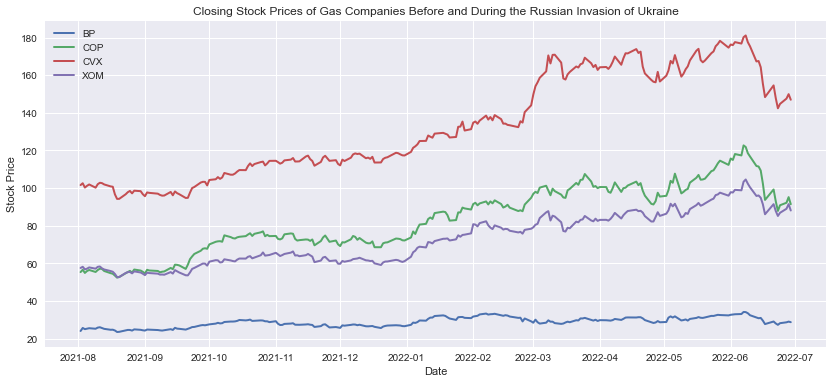

In [32]:
# Plot closing prices

plot_graph(gas_rusua_df, title="Closing Stock Prices of Gas Companies Before and During the Russian Invasion of Ukraine", y_label="Stock Price")

### Crude Oil Prices Data

In [33]:
# Import crude oil prices from csv in Resources folder

crude_df = pd.read_csv("Resources/RWTCm.csv", parse_dates=["Date"])
crude_df = crude_df.rename(columns={"perBarrel":"Dollars Per Barrel"})

In [34]:
# Check for null values

crude_df.isnull().sum()

Date                  0
Dollars Per Barrel    0
dtype: int64

In [35]:
# Investigate dataframe

crude_df.head

<bound method NDFrame.head of           Date  Dollars Per Barrel
0   1986-01-01               22.93
1   1986-02-01               15.46
2   1986-03-01               12.61
3   1986-04-01               12.84
4   1986-05-01               15.38
..         ...                 ...
434 2022-03-01              108.50
435 2022-04-01              101.78
436 2022-05-01              109.55
437 2022-06-01              114.84
438 2022-07-01              101.62

[439 rows x 2 columns]>

In [36]:
# Change "Date" column to datetime object

crude_df["Date"]=pd.to_datetime(crude_df["Date"])

# Set "Date" as the index

crude_df.set_index("Date", inplace=True)

In [37]:
# Investigate dataframe

crude_df.head()

Dollars Per Barrel
Date                          
1986-01-01               22.93
1986-02-01               15.46
1986-03-01               12.61
1986-04-01               12.84
1986-05-01               15.38

#### The Gulf War

In [38]:
# Create dataframe for oil prices during the Gulf War

gulf_oil_df = crude_df.loc["1990-02-01":"1990-12-31"]

# Investigate dataframe

gulf_oil_df.head()

Dollars Per Barrel
Date                          
1990-02-01               22.11
1990-03-01               20.39
1990-04-01               18.43
1990-05-01               18.20
1990-06-01               16.70

In [39]:
# Plot the prices

plot_graph(gulf_oil_df, title="US Oil Prices Before and During the Gulf War", y_label="Price Per Barrel")

#### The War in Iraq

In [40]:
# Create dataframe for oil prices during the War in Iraq

iraq_oil_df = crude_df.loc["2003-03-01":"2011-12-31"]

# Investigate dataframe

iraq_oil_df.head()

Dollars Per Barrel
Date                          
2003-03-01               33.51
2003-04-01               28.17
2003-05-01               28.11
2003-06-01               30.66
2003-07-01               30.76

In [41]:
# Plot the prices

plot_graph(iraq_oil_df, title="US Oil Prices During War in Iraq", y_label="Price Per Barrel")

#### The Russian Invasion of Ukraine

In [42]:
# Create dataframe for oil prices during the Russian Invasion of Ukraine

rus_ua_oil_df = crude_df.loc["2021-08-01":"2022-06-30"]

# Investigate dataframe

rus_ua_oil_df.head()

Dollars Per Barrel
Date                          
2021-08-01               67.73
2021-09-01               71.65
2021-10-01               81.48
2021-11-01               79.15
2021-12-01               71.71

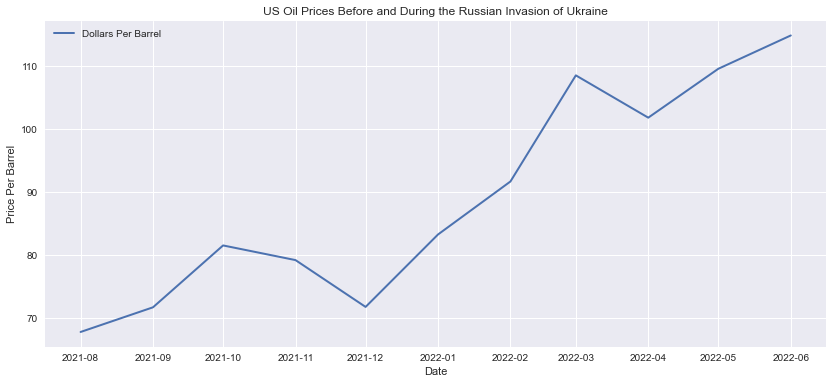

In [43]:
# Plot the prices

plot_graph(rus_ua_oil_df, title="US Oil Prices Before and During the Russian Invasion of Ukraine", y_label="Price Per Barrel")

### Housing Prices Data

In [44]:
# Load the .env environment variables

load_dotenv()

True

In [45]:
# Get the environment variables

q_API_KEY = os.getenv("QUANDL_API_KEY")

# Set up the API key

quandl.ApiConfig.api_key = q_API_KEY

#### The Russian Invasion of Ukraine

In [46]:
# Connect to Zillow via Quandl to get U.S. housing prices during the Russian Invasion of Ukraine

zillow_indicators = quandl.get_table("ZILLOW/INDICATORS", paginate=True)

# Investigate dataframe

zillow_indicators.head()

indicator_id                                          indicator  \
None                                                                   
0            ZSFH           ZHVI Single-Family Homes Time Series ($)   
1            ZCON                   ZHVI Condo/Co-op Time Series ($)   
2            ZATT           ZHVI All Homes- Top Tier Time Series ($)   
3            ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
4            ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   

         category  
None               
0     Home values  
1     Home values  
2     Home values  
3     Home values  
4     Home values

In [47]:
# Clean up dataframe to retrieve only "Home values" category

mask = zillow_indicators['category']=='Home values'

home_values_ind = zillow_indicators[mask]

# Investigate dataframe

home_values_ind.head()

## This dataframe describes the indicators present in the data set. We are going to use 
## the ZALL indicator_id (ZHVI All Homes(SFR, Condo/Co-op))

indicator_id                                          indicator  \
None                                                                   
0            ZSFH           ZHVI Single-Family Homes Time Series ($)   
1            ZCON                   ZHVI Condo/Co-op Time Series ($)   
2            ZATT           ZHVI All Homes- Top Tier Time Series ($)   
3            ZALL  ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)   
4            ZABT        ZHVI All Homes- Bottom Tier Time Series ($)   

         category  
None               
0     Home values  
1     Home values  
2     Home values  
3     Home values  
4     Home values

In [48]:
# Get the regions of the U.S. available on the Zillow API

zillow_regions = quandl.get_table('ZILLOW/REGIONS', paginate= True)

# Investigate dataframe

zillow_regions.head()

region_id region_type                                           region
None                                                                       
0        99999         zip   98847; WA; Wenatchee; Chelan County; Peshastin
1        99998         zip              98846; WA; Okanogan County; Pateros
2        99997         zip  98845; WA; Wenatchee; Douglas County; Palisades
3        99996         zip             98844; WA; Okanogan County; Oroville
4        99995         zip     98843; WA; Wenatchee; Douglas County; Orondo

In [49]:
# All the States in the U.S.

states = ['IA', 'KS', 'UT', 'VA', 'NC', 'NE', 'SD', 'AL', 'ID', 'FM', 'DE', 'AK', 'CT', 'PR', 'NM', 'MS', 'PW', 'CO', 'NJ', 'FL', 'MN', 'VI', 'NV', 'AZ', 'WI', 'ND', 'PA', 'OK', 'KY', 'RI', 'NH', 'MO', 'ME', 'VT', 'GA', 'GU', 'AS', 'NY', 'CA', 'HI', 'IL', 'TN', 'MA', 'OH', 'MD', 'MI', 'WY', 'WA', 'OR', 'MH', 'SC', 'IN', 'LA', 'MP', 'DC', 'MT', 'AR', 'WV', 'TX']

## The "region" column is a list of strings. We will use the "zip" type in the "region_type" column to find the state in which
## the region exists.

In [50]:
# Function to get the states in the "region" column

def state_check(search_field): 
    # Separate the search field data set into a list
    search_field = [elem.strip() for elem in search_field.split(";")]
    
    for elem in search_field:
        if elem in states: 
            return elem

In [51]:
# Create a new "state" field using "zip" in "region_type" column

mask = zillow_regions['region_type']=='zip'
zillow_regions_zip = zillow_regions[mask].copy()

In [52]:
# Create a new "state" column using the state_check function

zillow_regions_zip['state'] = zillow_regions_zip.apply(lambda x: state_check(x['region']), axis =1)

# Investigate dataframe

zillow_regions_zip.head()

region_id region_type                                           region  \
None                                                                          
0        99999         zip   98847; WA; Wenatchee; Chelan County; Peshastin   
1        99998         zip              98846; WA; Okanogan County; Pateros   
2        99997         zip  98845; WA; Wenatchee; Douglas County; Palisades   
3        99996         zip             98844; WA; Okanogan County; Oroville   
4        99995         zip     98843; WA; Wenatchee; Douglas County; Orondo   

     state  
None        
0       WA  
1       WA  
2       WA  
3       WA  
4       WA

#### The following function serves as a loop to get the housing market prices for all the states. Since each state could have several region_ids in excess of 1000, use a random sample of 30 from each state to calculate the average housing prices of each state. This part might take some time and therefore you should give it about 5-10 minutes to complete. The function will print out the iteration number to show its progress. Ends at iteration 58.

In [53]:
for id_, state in enumerate(states):
    
    # Get the rows with the current state value
    mask = zillow_regions_zip['state']==state
    
    # Filter the rows out in the dataframe
    zillow_ak = zillow_regions_zip[mask]
    
    # Get the region_ids for that particular state
    region_ids = zillow_ak['region_id'].unique()
    
    # Investigate the progress
    print(id)
    
    # Create a list of the region ids so as to get that with those particular IDs
    ids = list(region_ids)
    
    # Check if ids are > 100 since we are only going to pick a random sample of 100
    if len(ids)>100:
        r_ids = random.sample(ids, 30)
    elif len(ids)==0:
        continue
    else: 
        r_ids = ids
    
    # Get the dataframe containing the housing prices using the ZALL indicator_id from the home_values_ind  dataframe

    df = quandl.get_table('ZILLOW/DATA', indicator_id="ZALL", region_id=r_ids , paginate = True)
    
    # Group the "value" by date and then finding the average
    
    data = df.groupby(['date'])['value'].mean()
    
    # Check if it is the first iteration
    
    if id_==0: 
        data_df = pd.DataFrame(data)
        data_df.rename(columns = {'value': state}, inplace = True)
        data_df.reset_index(inplace = True)
    else:
        new_df = pd.DataFrame(data)
        new_df.rename(columns = {'value': state}, inplace = True)
        new_df.reset_index(inplace = True)
        data_df = pd.merge(data_df, new_df, how = 'left')

<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in function id>
<built-in f

In [54]:
# Investigate dataframe

data_df.head()

date            IA        KS             UT          VA  \
0 1996-01-31  86727.428571  123364.0  184213.400000  109064.125   
1 1996-02-29  86669.571429  123588.0  184359.200000  109194.500   
2 1996-03-31  86697.428571  123625.0  190498.500000  109394.750   
3 1996-04-30  86732.142857  123615.0  191645.666667  109888.125   
4 1996-05-31  86830.571429  123449.0  177883.777778  110204.125   

              NC             NE  SD            AL       ID  ...  \
0  100137.785714  108060.000000 NaN  77500.875000  93381.5  ...   
1   99979.142857  108563.833333 NaN  77655.250000  93253.5  ...   
2   99927.500000  108858.833333 NaN  77922.500000  93173.5  ...   
3   99864.142857  109295.166667 NaN  78409.500000  93017.0  ...   
4   99745.500000  109881.166667 NaN  79032.444444  92905.5  ...   

              WA         OR             SC       IN       LA        DC  MT  \
0  131737.933333  133986.55  102075.000000      NaN  70224.5  152310.8 NaN   
1  131789.600000  134436.65  102226.666667  58537.0  70395.0  151765.6 NaN   
2  131841.466667  134856.30  102404.000000  59635.0  70499.0  151237.8 NaN   
3  132004.800000  135739.10  102757.166667  60683.0  70808.5  150691.0 NaN   
4  132214.666667  136688.45  103211.000000  62745.0  71032.0  150246.0 NaN   

             AR            WV             TX  
0  55491.058824  41681.000000  109280.857143  
1  55517.294118  41528.000000  109745.142857  
2  55602.176471  41511.333333  109923.571429  
3  55741.411765  41392.666667  110558.428571  
4  55865.823529  41364.833333  111138.428571  

[5 rows x 52 columns]

In [55]:
# Get housing prices during the Russian Invasion of Ukraine 

mask = data_df['date']>="2021-08-01"

# Create dataframe

ukr_rus_df = data_df[mask].copy()
ukr_rus_df = ukr_rus_df.round(2)

# Calculate the national average

ukr_rus_df['national_average'] = ukr_rus_df.mean(axis=1).round(2)
ukr_rus_df['national_median'] = ukr_rus_df.median(axis=1).round(2)

# Investigate dataframe

ukr_rus_df.head()

date         IA         KS         UT         VA         NC  \
307 2021-08-31  156597.62  179033.30  397933.50  227091.27  200775.37   
308 2021-09-30  157966.28  180960.13  405742.68  228941.53  207889.31   
309 2021-10-31  159145.86  182874.65  412373.54  230589.87  208290.53   
310 2021-11-30  160114.62  184163.48  418127.71  231960.43  212734.50   
311 2021-12-31  162128.90  185941.83  426311.89  235184.90  221055.00   

            NE         SD         AL         ID  ...         SC         IN  \
307  192142.43  230537.96  124485.60  368365.37  ...  184291.00  151200.87   
308  193622.64  233029.86  125605.53  374769.07  ...  187765.83  152977.20   
309  194663.79  235340.64  123569.07  379999.03  ...  191323.67  154599.73   
310  195680.04  237836.79  127764.57  382642.03  ...  194628.07  156043.27   
311  198523.04  242209.96  129685.07  393689.72  ...  198376.73  158088.57   

            LA         DC         MT         AR         WV         TX  \
307  125995.19  671672.88  315515.70  109363.13   98916.03  217277.28   
308  127090.27  670978.50  320228.11  110373.57   99613.34  221249.17   
309  128064.58  672519.00  324255.56  111336.57  100471.48  224484.76   
310  126052.67  671411.12  326161.37  112348.27  101091.55  226828.38   
311  126132.42  671481.88  332209.63  114569.87  100845.26  230790.93   

     national_average  national_median  
307         285388.00        235796.93  
308         289165.82        238976.95  
309         292373.48        242156.95  
310         295227.99        244466.70  
311         299304.41        248841.76  

[5 rows x 54 columns]

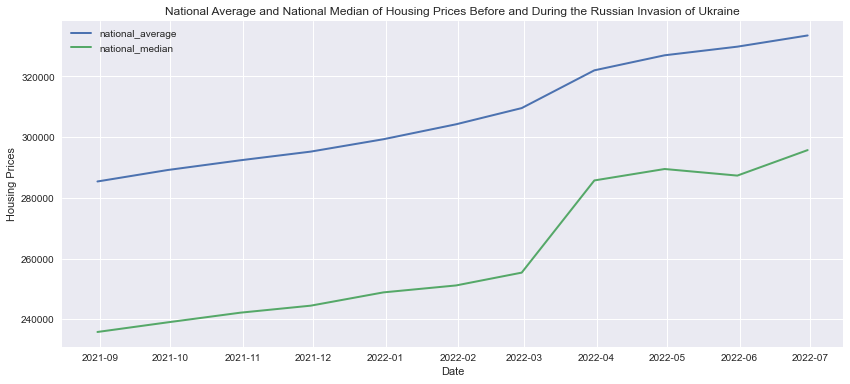

In [56]:
# Plot the national average and national median

ukr_rus_plot_df = ukr_rus_df.set_index('date')

cols =['national_average', 'national_median']

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

for c in cols: 
    ax.plot(c, linewidth=2, data=ukr_rus_plot_df)
    ax.set_title('National Average and National Median of Housing Prices Before and During the Russian Invasion of Ukraine')
    plt.xlabel('Date')
    plt.ylabel('Housing Prices')

    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left', prop = {"size":10})

plt.show()

#### The Gulf War

In [57]:
# Import housing prices from Federal Reserve Economic Data csv in Resources folder

df = pd.read_csv("Resources/gulf_war_index.csv")

# Investigate dataframe

df.head()

observation_date  QUSR628BIS
0       1970-01-01     60.8903
1       1970-04-01     60.3328
2       1970-07-01     60.6021
3       1970-10-01     60.5464
4       1971-01-01     61.7321

In [58]:
# Clean up dataframe

df["observation_date"] = pd.to_datetime(df["observation_date"])
df.rename(columns = {"QUSR628BIS": "quarterly_housing_prices"}, inplace = True)

# Investigate dataframe

df.head()

observation_date  quarterly_housing_prices
0       1970-01-01                   60.8903
1       1970-04-01                   60.3328
2       1970-07-01                   60.6021
3       1970-10-01                   60.5464
4       1971-01-01                   61.7321

In [59]:
# Create dataframe for housing prices during the Gulf War

mask1 = df["observation_date"] >= "1990-01-01"
mask2 = df["observation_date"] <= "1991-01-01"
mask = mask1&mask2
gulf_df = df[mask]

# Investigate dataframe

gulf_df.head()

observation_date  quarterly_housing_prices
80       1990-01-01                   93.8162
81       1990-04-01                   93.1032
82       1990-07-01                   91.2690
83       1990-10-01                   89.3036
84       1991-01-01                   88.1170

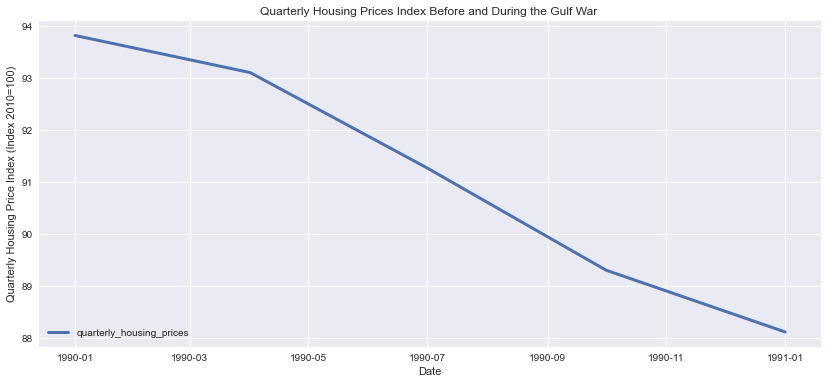

In [60]:
# Plot the quartely pricing index

gulf_plot_df = gulf_df.set_index('observation_date')

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

ax.plot('quarterly_housing_prices', linewidth=3, data=gulf_plot_df)
ax.set_title('Quarterly Housing Prices Index Before and During the Gulf War ')
plt.xlabel('Date')
plt.ylabel('Quarterly Housing Price Index (Index 2010=100)')

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', prop = {"size":10})

plt.show()

#### The War in Iraq

In [61]:
# Create dataframe for housing prices during the War in Iraq

mask1 = df['observation_date'] >= "2003-04-01"
mask2 = df['observation_date'] <= "2012-01-01"
mask = mask1&mask2
iraq_df = df[mask]

# Investigate dataframe

iraq_df.head()

observation_date  quarterly_housing_prices
133       2003-04-01                  116.1994
134       2003-07-01                  118.9464
135       2003-10-01                  122.7670
136       2004-01-01                  125.8849
137       2004-04-01                  128.9512

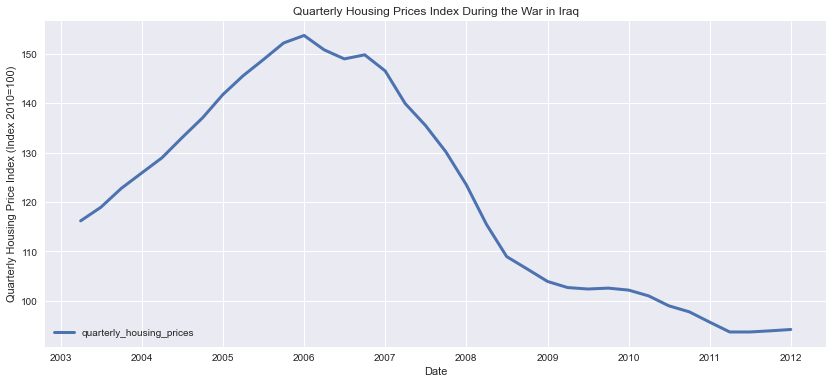

In [62]:
# Plot the quartely pricing index

iraq_plot_df = iraq_df.set_index('observation_date')

fig,ax = plt.subplots(1,1, figsize = (14,6))
plt.style.use('seaborn')

ax.plot('quarterly_housing_prices', linewidth=3, data=iraq_plot_df)
ax.set_title('Quarterly Housing Prices Index During the War in Iraq')
plt.xlabel('Date')
plt.ylabel('Quarterly Housing Price Index (Index 2010=100)')

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='lower left', prop = {"size":10})

plt.show()

##### The War in Iraq: Housing GeoViews

In [63]:
# Create dataframe for housing prices and location

df = pd.read_csv("Resources/state_housing_df.csv")

# Cleanup dataframe

df = df.drop(columns=["latitude","longitude","name"])

# Create new dataframe to unpivot from wide format to long format

df2 = pd.melt(df, id_vars = ["state"], var_name=["columns"])

# Investigate dataframe

df2.head()

state              columns      value
0    IA  2003-03-31 00:00:00  102731.38
1    KS  2003-03-31 00:00:00  157743.18
2    UT  2003-03-31 00:00:00  198493.46
3    VA  2003-03-31 00:00:00  134937.38
4    NC  2003-03-31 00:00:00  140564.23

In [64]:
# Select columns

df2.columns = ["state","date","value"]

In [65]:
# Convert columns to appropriate object types

df2["date"] = pd.to_datetime(df2["date"])

df2["monthYear"] = df2["date"].dt.strftime('%m-%Y')

df2["Year"] = df2["date"].dt.strftime('%Y')

In [66]:
# Cleanup dataframe

df2 = df2.dropna()

# Investigate dataframe

df2.head()

state       date      value monthYear  Year
0    IA 2003-03-31  102731.38   03-2003  2003
1    KS 2003-03-31  157743.18   03-2003  2003
2    UT 2003-03-31  198493.46   03-2003  2003
3    VA 2003-03-31  134937.38   03-2003  2003
4    NC 2003-03-31  140564.23   03-2003  2003

In [67]:
# Plot data in a geographical scatter plot into an animated plotly map using Plotly Express

fig = px.scatter_geo(df2,
                    locations ="state",
                    color = "state",
                    hover_name = "state",
                    size = "value",
                    animation_frame="Year",
                    scope = "usa",
                    basemap_visible = True,
                    locationmode = "USA-states",
                    projection="albers usa",
                    title = "Average Housing Prices During the War in Iraq"
                    )
fig.show()

### Unemployment Rate Data

#### The Gulf War

In [68]:
# Get unemployment rate data from the Federal Reserve Economic Data API

gulf_unemp_df = quandl.get(["FRED/UNRATE", "FRED/UNEMPLOY"], trim_start = "1990-02-1", trim_end="1990-12-31", collapse = 'monthly')
gulf_unemp_df.columns = ['Gulf_unemploy_rate', 'Gulf_unemploy_level']

# Investigate dataframe

gulf_unemp_df.head()

Gulf_unemploy_rate  Gulf_unemploy_level
Date                                               
1990-02-28                 5.3               6651.0
1990-03-31                 5.2               6598.0
1990-04-30                 5.4               6797.0
1990-05-31                 5.4               6742.0
1990-06-30                 5.2               6590.0

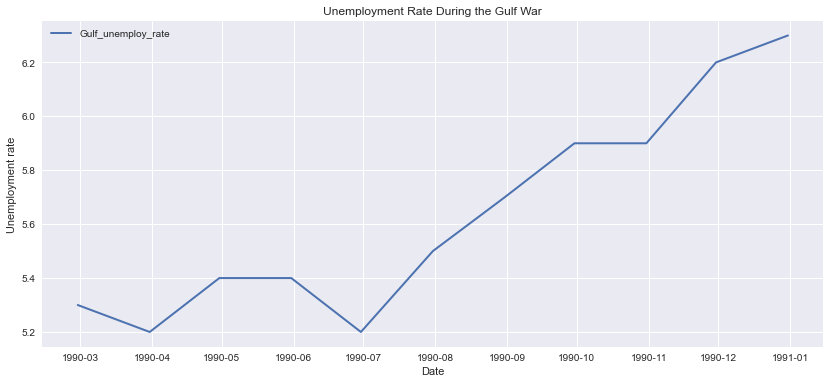

In [69]:
# Plot rates

gulf_unemp_df = gulf_unemp_df[['Gulf_unemploy_rate']].copy()
plot_graph(gulf_unemp_df, title="Unemployment Rate During the Gulf War", y_label="Unemployment rate")

#### The War in Iraq

In [70]:
# Get unemployment rate data from the Federal Reserve Economic Data API

iraq_unemp_df = quandl.get(["FRED/UNRATE", "FRED/UNEMPLOY"], trim_start = "2003-03-01", trim_end="2011-12-31", collapse = 'monthly')
iraq_unemp_df.columns = ['Iraq_unemploy_rate', 'Iraq_unemploy_level']

# Investigate dataframe

iraq_unemp_df.head()

Iraq_unemploy_rate  Iraq_unemploy_level
Date                                               
2003-03-31                 5.9               8588.0
2003-04-30                 6.0               8842.0
2003-05-31                 6.1               8957.0
2003-06-30                 6.3               9266.0
2003-07-31                 6.2               9011.0

In [71]:
# Plot rates

iraq_unemp_df = iraq_unemp_df[['Iraq_unemploy_rate']].copy()
plot_graph(iraq_unemp_df, title="Unemployment Rate During the War in Iraq", y_label="Unemployment rate")

#### The Russian Invasion of Ukraine

In [72]:
# Get unemployment rate data from the Bureau of Labor Statistics

headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2021", "endyear":"2022"})
p = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
json_data = json.loads(p.text)

data_list = []
for series in json_data['Results']['series']:
    
    seriesId = series['seriesID']
    
    data = series['data']
    
    for datum in data: 
        
        data = {'year':datum['year'],'month':datum['periodName'], 'value':datum['value']}
        data_list.append(data)
    
rus_unemp_df = pd.DataFrame(data_list)

# Investigate dataframe

rus_unemp_df.head()

year  month value
0  2022   July   3.5
1  2022   June   3.6
2  2022    May   3.6
3  2022  April   3.6
4  2022  March   3.6

In [73]:
# Create the date column, renaming the value column and creating a dataframe with the date and unemployment rate columns only

rus_unemp_df['date'] = pd.to_datetime(rus_unemp_df['year']+"-"+rus_unemp_df['month']+"-"+"01")
rus_unemp_df.rename(columns = {'value': 'unemployment_rate'}, inplace= True)
rus_unemp_df = rus_unemp_df[['date', 'unemployment_rate']].copy()

# Investigate dataframe

rus_unemp_df.head()

date unemployment_rate
0 2022-07-01               3.5
1 2022-06-01               3.6
2 2022-05-01               3.6
3 2022-04-01               3.6
4 2022-03-01               3.6

In [74]:
# Filter out the dates before 2021-07-01

mask = rus_unemp_df["date"] > "2021-07-01"
rus_final_df = rus_unemp_df[mask]

# Setting the date as the index 

rus_final_df.set_index("date", inplace = True)

# Investigate dataframe

rus_final_df.head()

unemployment_rate
date                        
2022-07-01               3.5
2022-06-01               3.6
2022-05-01               3.6
2022-04-01               3.6
2022-03-01               3.6

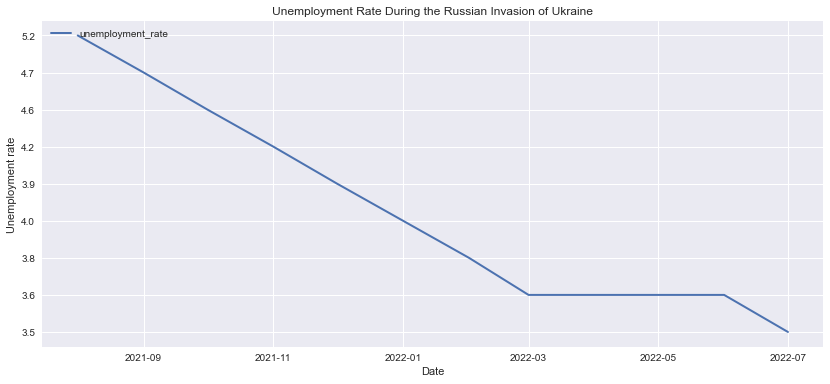

In [75]:
# Plot rates

plot_graph(rus_final_df, title="Unemployment Rate During the Russian Invasion of Ukraine", y_label="Unemployment rate")

### Inflation Rate Data

In [76]:
# Get inflation rate data from the Federal Reserve Economic Data csv in Resources folder

inflation_df = pd.read_csv("Resources/Inflation_rates.csv")

inflation_df.head()

YEAR   JAN   FEB   MAR   APR   MAY   JUN   JUL   AUG   SEP   OCT   NOV  \
0  1914   2.0   1.0   1.0   0.0   2.1   1.0   1.0   3.0   2.0   1.0   1.0   
1  1915   1.0   1.0   0.0   2.0   2.0   2.0   1.0  -1.0  -1.0   1.0   1.0   
2  1916   3.0   4.0   6.1   6.0   5.9   6.9   6.9   7.9   9.9  10.8  11.7   
3  1917  12.5  15.4  14.3  18.9  19.6  20.4  18.5  19.3  19.8  19.5  17.4   
4  1918  19.7  17.5  16.7  12.7  13.3  13.1  18.0  18.5  18.0  18.5  20.7   

    DEC   AVE  
0   1.0   1.0  
1   2.0   1.0  
2  12.6   7.9  
3  18.1  17.4  
4  20.4  18.0

In [77]:
# Function to get the data from the dataframe

def get_data(years):
    
    for id, year in enumerate(years):
        
        mask = inflation_df["YEAR"]==year
        new_df = inflation_df[mask]

        if id==0:        
            data_df = new_df
        else: 
            data_df = pd.concat([data_df, new_df])
            
    return data_df

#### The Gulf War

In [78]:
# Fetch data from the inflation rate dataframe

gulf_df = get_data([1990, 1991])

# Set 'YEAR' as the index

gulf_df.set_index('YEAR', inplace = True)

# Transpose

gulf_df = gulf_df.transpose()

# Drop 'AVE' column

gulf_df = gulf_df.drop('AVE')

# Investigate dataframe

gulf_df.head()

YEAR  1990  1991
JAN    5.2   5.7
FEB    5.3   5.3
MAR    5.2   4.9
APR    4.7   4.9
MAY    4.4   5.0

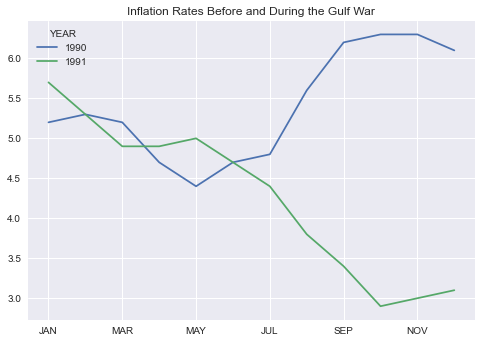

In [79]:
# Plot dataframe

gulf_df.plot(title = "Inflation Rates Before and During the Gulf War");

#### The War in Iraq

In [80]:
# Fetch data from the inflation rate dataframe

iraq_df = get_data([2003, 2004, 2005, 2006,2007, 2008,2009,2010, 2011])

# Set 'YEAR' as the index

iraq_df.set_index('YEAR', inplace= True)

# Transpose

iraq_df = iraq_df.transpose()

# Drop 'AVE' column

iraq_df = iraq_df.drop('AVE')

# Investigate dataframe

iraq_df.head()

YEAR  2003  2004  2005  2006  2007  2008  2009  2010  2011
JAN    2.6   1.9   3.0   4.0   2.1   4.3   0.0   2.6   1.6
FEB    3.0   1.7   3.0   3.6   2.4   4.0   0.2   2.1   2.1
MAR    3.0   1.7   3.1   3.4   2.8   4.0  -0.4   2.3   2.7
APR    2.2   2.3   3.5   3.5   2.6   3.9  -0.7   2.2   3.2
MAY    2.1   3.1   2.8   4.2   2.7   4.2  -1.3   2.0   3.6

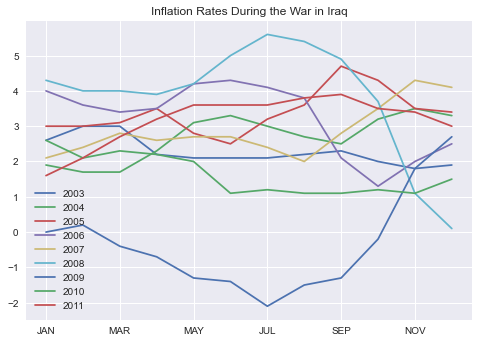

In [81]:
# Plot dataframe

iraq_df.plot(title = "Inflation Rates During the War in Iraq");
plt.legend();

#### The Russian Invasion of Ukraine

In [82]:
# Fetch data from the inflation rate dataframe

uk_rus_df = get_data([2021, 2022])

# Set 'YEAR' as the index

uk_rus_df.set_index('YEAR', inplace = True)

# Transpose

uk_rus_df = uk_rus_df.transpose()

# Drop 'AVE' column

uk_rus_df = uk_rus_df.drop('AVE')

# Investigate dataframe

uk_rus_df.head()

YEAR  2021  2022
JAN    1.4   7.5
FEB    1.7   7.9
MAR    2.6   8.5
APR    4.2   8.3
MAY    5.0   8.6

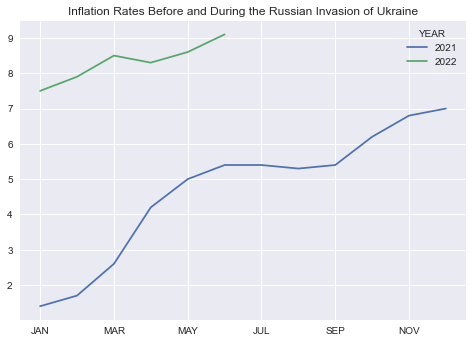

In [83]:
# Plot dataframe

uk_rus_df.plot(title = "Inflation Rates Before and During the Russian Invasion of Ukraine");

### Interest Rate Data

In [84]:
# Get interest rate data from the Federal Reserve Economic Data csv in Resources folder

interestrates_df = pd.read_csv("Resources/FEDFUNDS.csv")

# Investigate dataframe

interestrates_df.head()

DATE  FEDFUNDS
0  1954-07-01      0.80
1  1954-08-01      1.22
2  1954-09-01      1.07
3  1954-10-01      0.85
4  1954-11-01      0.83

In [85]:
# Cleanup dataframe

interestrates_df["DATE"] = pd.to_datetime(interestrates_df["DATE"])
interestrates_df.rename(columns = {"FEDFUNDS":"interest rate", "DATE":"date"}, inplace = True)
interestrates_df.set_index("date", inplace=True)

# Investigate dataframe

interestrates_df.head()

interest rate
date                     
1954-07-01           0.80
1954-08-01           1.22
1954-09-01           1.07
1954-10-01           0.85
1954-11-01           0.83

#### The Gulf War

In [86]:
# Create dataframe for interest rates during the Gulf War

gulf_interestrates_df = interestrates_df.loc["1990-02-01":"1990-12-31"]

# Investigate dataframe

gulf_interestrates_df.head()

interest rate
date                     
1990-02-01           8.24
1990-03-01           8.28
1990-04-01           8.26
1990-05-01           8.18
1990-06-01           8.29

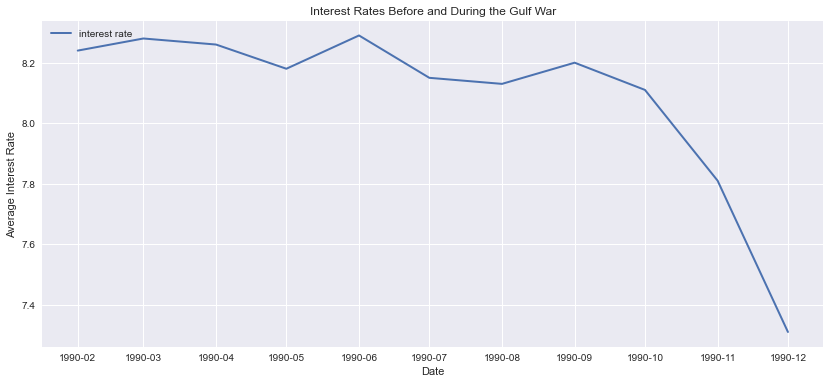

In [87]:
# Plot average interest rates before and during the Gulf War

plot_graph(gulf_interestrates_df, title="Interest Rates Before and During the Gulf War", y_label="Average Interest Rate")

#### The War in Iraq

In [88]:
# Create dataframe for interest rates during the War in Iraq

iraq_interestrates_df = interestrates_df.loc["2003-03-01":"2011-12-31"]

# Investigate dataframe

iraq_interestrates_df.head()

interest rate
date                     
2003-03-01           1.25
2003-04-01           1.26
2003-05-01           1.26
2003-06-01           1.22
2003-07-01           1.01

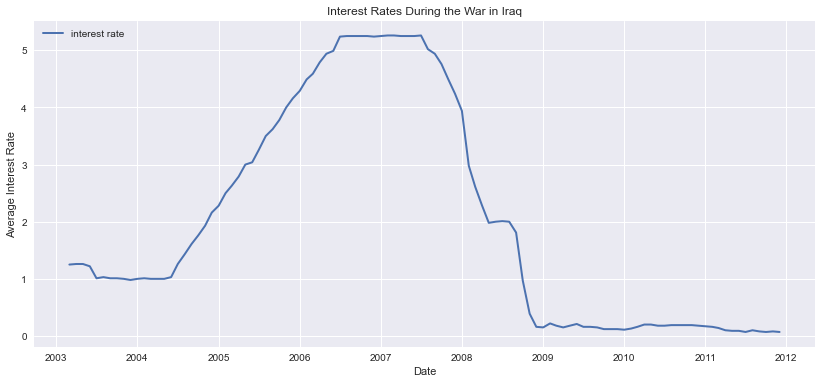

In [89]:
# Plot average interest rates during the War in Iraq

plot_graph(iraq_interestrates_df, title="Interest Rates During the War in Iraq", y_label="Average Interest Rate")

#### The Russian Invasion of Ukraine

In [90]:
# Create dataframe for interest rates before and during the Russian Invasion of Ukraine

rusua_interestrates_df = interestrates_df.loc["2021-08-01":"2022-06-30"]

# Investigate dataframe

rusua_interestrates_df.head()

interest rate
date                     
2021-08-01           0.09
2021-09-01           0.08
2021-10-01           0.08
2021-11-01           0.08
2021-12-01           0.08

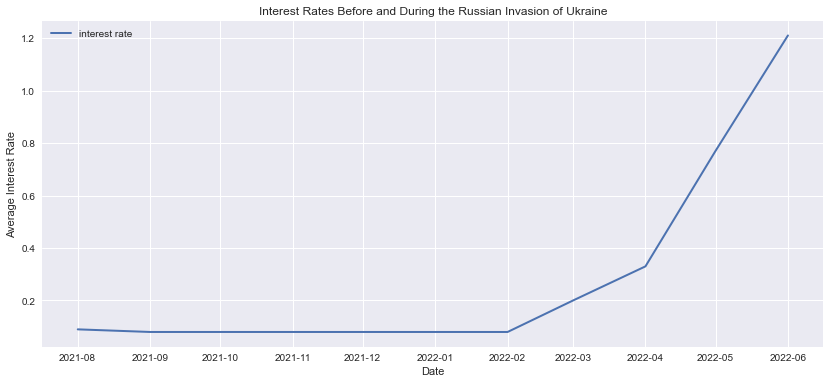

In [91]:
# Plot average interest rates before and during the Russian Invasion of Ukraine

plot_graph(rusua_interestrates_df, title="Interest Rates Before and During the Russian Invasion of Ukraine", y_label="Average Interest Rate")